# Effect Size Comparison

A beta-beta plot (also known as a beta vs. beta plot) is a graphical representation often used to compare the effect sizes (betas) from two different GWAS summary statistics. These plots show the relationship between the effect sizes (betas) of SNPs from two studies.

It is important to remark that both GWAS summary statistics must be harmonized, in order to obtain a meaningful plot.

In this notebook we give a basic example of how to draw a beta-vs-beta plot using `ideal-genom`.

In [ ]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import beta_beta_draw
from ideal_genom.get_examples import get_height_japanese_gwas

The data is taken from the article

Akiyama, Masato, et al. Characterizing rare and low-frequency height-asssociated variants in the Japanese population. *Nature Communications* **10**, (2019): 4393. https://doi.org/10.1038/s41467-019-12276-5

To draw this plot, we use summary statistics generated for males and females.

In [ ]:
gwas_f, gwas_m = get_height_japanese_gwas()

2025-06-24 11:10:10,895 - INFO - Files /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt and /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt already exist


In [3]:
df_F = pd.read_csv(gwas_f, sep='\t')
df_M = pd.read_csv(gwas_m, sep='\t')

Once the data is loaded as pandas dataframes, the suer must make sure that column names are the same across both datasets, otherwise an exception will be thrown.

Moreover, the user can decide if all common significant SNPs will be annotated or no. In this particular case, there are too many to make the plot useful, so we decided not to annotate the coincident SNPs.  

2025-06-24 11:10:21,514 - INFO - Number of SNPs significant in Females GWAS: 202
2025-06-24 11:10:21,519 - INFO - Number of SNPs significant in both GWAS: 746
2025-06-24 11:10:21,525 - INFO - Number of SNPs significant in Males GWAS: 1191
2025-06-24 11:10:22,195 - INFO - Plotting beta-beta scatter plot with error bars...
2025-06-24 11:10:22,282 - INFO - Drawing regression line...
2025-06-24 11:10:22,284 - INFO - Regression line: y = 1.00x + 0.00


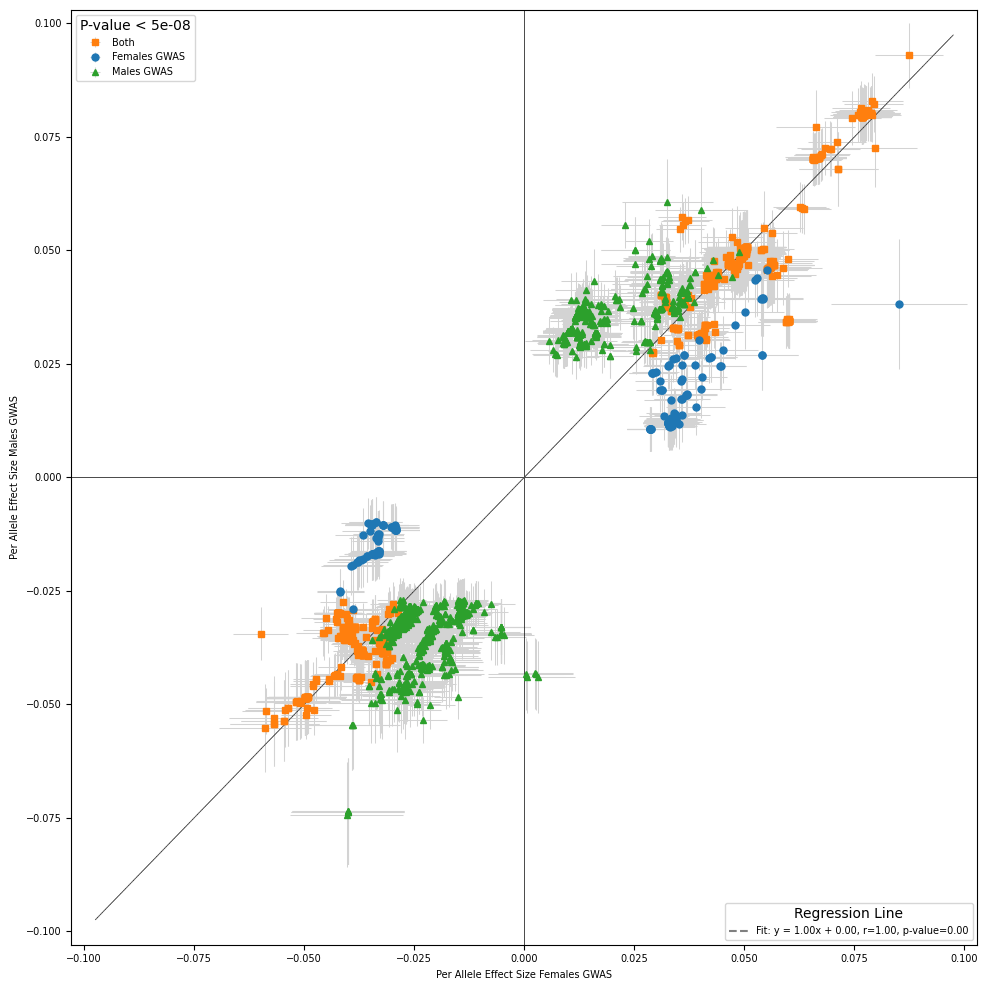

True

In [4]:
beta_beta_draw(
    gwas_1  = df_F,
    gwas_2  = df_M,
    snp_col ='SNP',
    p_col   ='P',
    beta_col='BETA',
    se_col  ='SE',
    label_1 ='Females',
    label_2 ='Males',
    plot_dir=gwas_f.parent.as_posix(),
    save_name='beta_beta.png',
    annotate_coincidents=False,
    significance=5e-08,
    )

Although the user can choose if to annotate the SNPs with certain difference between studies in absolute value. 

In this example, we choose to annotate SNPs with a difference between betas greater than 0.04

2025-06-24 11:10:26,688 - INFO - Number of SNPs significant in Females GWAS: 202
2025-06-24 11:10:26,691 - INFO - Number of SNPs significant in both GWAS: 746
2025-06-24 11:10:26,694 - INFO - Number of SNPs significant in Males GWAS: 1191
2025-06-24 11:10:27,359 - INFO - Plotting beta-beta scatter plot with error bars...
2025-06-24 11:10:27,414 - INFO - Drawing regression line...
2025-06-24 11:10:27,415 - INFO - Regression line: y = 1.00x + 0.00
2025-06-24 11:10:27,465 - INFO - Number of SNPs with difference in effect size > 0.04: 6


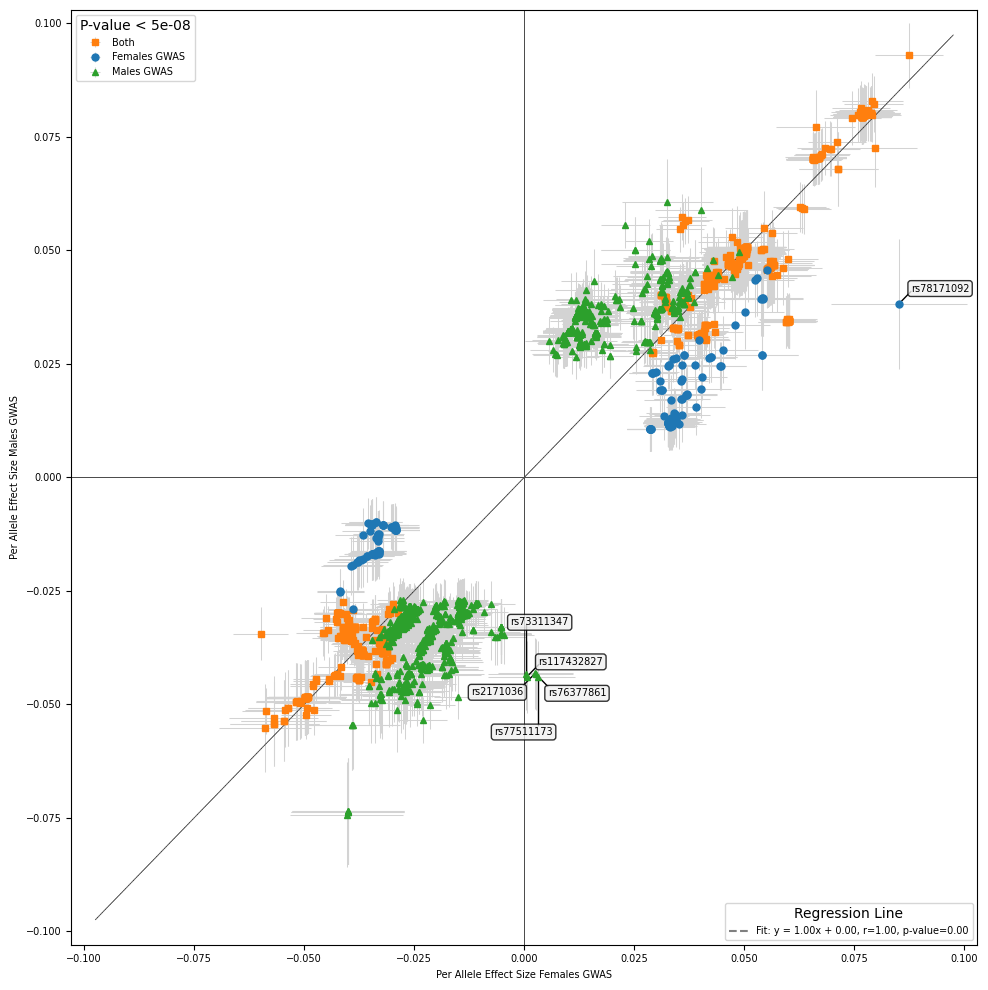

True

In [5]:
beta_beta_draw(
    gwas_1  = df_F,
    gwas_2  = df_M,
    snp_col ='SNP',
    p_col   ='P',
    beta_col='BETA',
    se_col  ='SE',
    label_1 ='Females',
    label_2 ='Males',
    plot_dir=gwas_f.parent.as_posix(),
    save_name='beta_beta_anno.png',
    annotate_coincidents=False,
    significance=5e-08,
    annotate_diff=0.04,
    )